**<h1><center> Market Sentiment Analysis Over a Day</center></h1>**

<h3><center>By: Gyan Prakash Tripathi</center></h3>

The objective of this notebook is to analyze the public sentiment about share market of a particular day and depict the market trends based on that.

# Step 1 : Installing and importing required libraries 


In [501]:
!pip install  tweepy
# install wordcloud
!pip install wordcloud
!pip install textblob
!pip install preprocessor


In [502]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
# import package and its set of stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression

from textblob import TextBlob
import string
import preprocessor as p
import tweepy
import csv
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 

# Strategy:
We will use twitter API to fetch the tweets over last one or two days. Every news agency is available on twitter and they tweet upcoming headlines.

### Why Twitter?  
1. Every news agency is available on twitter. Thus we can get the precise news in limited words in real time.
2. Hashtags can be used to find out the tweets related with specific subject.
3. Useful news is often retweeted. On the basis of retweets we can determine the significance of news.

### What to do with the data?
1. We will find the sentiments associated with the tweets.
2. We will use wordcloud to show the most used words.

*On the basis of above two, we can get an idea of the market trends.*

# Step 2 : Connecting to Twitter API


In [0]:
####input your credentials here
consumer_key = '......'
consumer_secret = '......'
access_token = '.......'
access_token_secret = '.......'



In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


In [0]:
api = tweepy.API(auth,wait_on_rate_limit=True)
#####United Airlines
# Open/Create a file to append data


## Save the obtained data to a file.

In [507]:
csvFile = open('twitter.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)
tweets = api.search(q="#stockmarket",count=1000,lang="en", since="2019-05-30")
csvWriter.writerow(["tweet text"])


12

### Let's see the format of fetched data

In [555]:
tweets[1:5]

[Status(_api=<tweepy.api.API object at 0x7f5f41377cc0>, _json={'created_at': 'Sat Jun 01 07:47:53 +0000 2019', 'id': 1134728255595057153, 'id_str': '1134728255595057153', 'text': 'Bitcoin recognized as an official currency on Microsoft Excel\n#financialfreedom #entrepreneurship #investment… https://t.co/2coTnfyKHP', 'truncated': True, 'entities': {'hashtags': [{'text': 'financialfreedom', 'indices': [62, 79]}, {'text': 'entrepreneurship', 'indices': [80, 97]}, {'text': 'investment', 'indices': [98, 109]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/2coTnfyKHP', 'expanded_url': 'https://twitter.com/i/web/status/1134728255595057153', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [111, 134]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_rep

### Getting the raw tweets

In [509]:
temp=[]
for tweet in tweets:
#for tweet in tweepy.Cursor(api.search,q="#stocks",count=10,lang="en",since="2017-02-30").items(50):
    print (tweet.created_at, tweet.text)
    temp.append(tweet.text)
    csvWriter.writerow([tweet.text.encode('utf-8')])
csvFile.close()

2019-06-01 07:49:11 Merck &amp; Co. Inc. (https://t.co/PC3V5hn3gO): Pulling the Layers Back For The Chaikin Oscillator… https://t.co/8ciVT03wpE
2019-06-01 07:47:53 Bitcoin recognized as an official currency on Microsoft Excel
#financialfreedom #entrepreneurship #investment… https://t.co/2coTnfyKHP
2019-06-01 07:43:41 #Mumbai
#coworking
#selfemployed

I'm into #stockmarket trading, .. 

I'm looking for a decent company for routine… https://t.co/IMk8CioVys
2019-06-01 07:43:41 RT @RKGlobal_India: Making sure that you are well updated about the recent happenings in the stock market. Know more: https://t.co/fESW38vG…
2019-06-01 07:42:49 #Modi2.0 lifts #StockMarket spirits, #reforms push set to continue. Read more: https://t.co/XKhXdikUgd  #MarketWrap https://t.co/zgBO0XFTXa
2019-06-01 07:42:18 RT @RKGlobal_India: Making sure that you are well updated about the recent happenings in the stock market. Know more: https://t.co/fESW38vG…
2019-06-01 07:41:00 RT @RKGlobal_India: Making sure that yo

# Step 3 : Preprocessing

In [510]:
#Create a string form of our list of text

raw_string = ''.join(temp)
no_links = re.sub(r'http\S+', ' ', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", ' ', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', ' ', no_unicode)
no_special_characters

'Merck  amp  Co  Inc     Pulling the Layers Back For The Chaikin Oscillator    recognized as an official currency on Microsoft Excel financialfreedom  entrepreneurship  investment    coworking selfemployed I m into  stockmarket trading     I m looking for a decent company for routine     RKGlobal India  Making sure that you are well updated about the recent happenings in the stock market  Know more    lifts  StockMarket spirits   reforms push set to continue  Read more      MarketWrap    RKGlobal India  Making sure that you are well updated about the recent happenings in the stock market  Know more     RKGlobal India  Making sure that you are well updated about the recent happenings in the stock market  Know more     RKGlobal India  Making sure that you are well updated about the recent happenings in the stock market  Know more     AARYANAMATASCO  ICE MAKE BOD Recommend Final Dividend of Rs    per equity share ICEMake  ICEMakeRefrigeration  NSE  NSEEMERGE  Stoc Cont Sessions Gainers  F

In [0]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]


### Storing the words in a list

In [512]:
stop_words=set(stopwords.words('english'))
words = [w for w in words if w not in stop_words]
words.sort()
words

['aaron',
 'aaryanamatasco',
 'aaryanamatasco',
 'aaryanamatasco',
 'accepting',
 'accepting',
 'account',
 'ahhh',
 'alerts',
 'algotrading',
 'alkermes',
 'alks',
 'almost',
 'amp',
 'amp',
 'amp',
 'analysis',
 'antitrust',
 'apps',
 'apps',
 'areas',
 'around',
 'arunjaitley',
 'ashish',
 'asset',
 'attract',
 'aum',
 'aum',
 'ava',
 'average',
 'away',
 'back',
 'backtest',
 'bcn',
 'bcn',
 'becoming',
 'believing',
 'bengaluru',
 'berminalapp',
 'best',
 'better',
 'better',
 'better',
 'bid',
 'bio',
 'biotech',
 'bitcoin',
 'bod',
 'bod',
 'bod',
 'bookshelves',
 'bookshelves',
 'bookshelves',
 'bookshelves',
 'brtechnicals',
 'bse',
 'bsesme',
 'bsesme',
 'btg',
 'btg',
 'btm',
 'btm',
 'call',
 'call',
 'calls',
 'cboe',
 'centric',
 'chaikin',
 'chanakya',
 'charts',
 'chemburstudio',
 'children',
 'classes',
 'click',
 'clients',
 'coinbase',
 'colgate',
 'column',
 'column',
 'column',
 'commodities',
 'comp',
 'company',
 'company',
 'company',
 'company',
 'company',
 'c

### We still have lots of unwanted words in our list. 
Words like 'bookshelves' are out of context. We would not like to perform our analysis over them. In order to do so, we will make a list of all suck words and remove them from our list.

In [0]:
morestopwords=['what','indicator','tariffs','susanlitv','sign','strategy','stem','stockstotrade','sharemarket','sharing','showing','share','services','schemes','rmd','returns','reports','recommends','readersdelight','money','kindledeals','info','investors','investment','interested','heatmap','aaryanamatasco','freeebook','freeebooks','crores','details','dividend','equity','financialfreedom','financialmarkets','financialplanners','financialpodcast','financialsolutions',
               'trump','trading','day','deals','day','company','bookshelves','announcement','daytrading','stockmarket','saying','stock','rkglobal','dad','recent','ravencointalk','monthly','djia','getting','happenings','india','know','lwdaytrading','making','market','india','happenings','who','is','a','at','is','he','1daytrading','stockmarket',
               'stock','stocks','amp','pick','mrket','1wdytrding','rkglobal','rkglobalindia','market','know','recent'
              ,'mp','dytrding','trding','rt','bitcoin','dow','1w','investor','trde','tru','time'
              ,'closed','month','months','one','wke','triff','going','dy','iose','vocdos','mericn'
              ,'four','first','nnouncement','cpitl','bound','nyse','new','tips','cut','option','lps','fri','finnce'
              ,'hbits','lwys','wnt','morning','sndrdirkson','1wys','supply','f11','undermine','sying','group','spy',
              'fll','indictor','chart','markets','net','em','show','soly','dily','llied','dont','could','weekly','crypto'
              ,'focus','wr','rk','grpht','finncil','dnd','fuck','number','vwp','let','ch','tech','left',
              'sted','le','depend','need','crossing','something','te','wolfpck','es','dlgrepo','invt','invting','cross','free','clss','recent','lifty'
              ,'ing','gps','column','become','frm','clt','tokeniz','since','kdp','cll','eltk','relly','sset'
              ,'ccount','get','position','updated','market','may','mexico','mex','ntnx','grph','zuo','sy','crow','nlys','mu','per','mxmin'
              ,'point','kdom','ru','lt','st','week','cuse','look','know','currency','quickbut','tyrnts','ld',
              'se','wt','lindt','gurned','riquick','humnity','mnufctur','inre','con','ri','crs','wit','hon','dd',
              'drd','never','rs','mkeitplin','egreenboxs','rvencointlk','suluckeee','forex','nmed','upid',
              'nnrr','rm','mind','comnity','rvic','bw','tcck','dt','xrp','tool','tinu','ss','com','dciplined',
              'tool','doubd','future','currenci','otionslk','busin','mizuho','ds','pe','meet','yellow','igs','cgl',
              'nsdq','red','ded','ser','mfg','nicl','notb','cph','pl','ho','uced','en','sbot','ed']


In [0]:
for i in words:
    if i in morestopwords:
        print (i)
        words.remove(i)



### List to string conversion

In [0]:
def convert(list): 
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res = (" ".join(s)) 
      
    return(res) 

In [0]:
alice_novel=convert(words)


# Step 4 : Sentiment Analysis

In [0]:
blob = TextBlob(alice_novel)

Sentiment = blob.sentiment     
polarity = Sentiment.polarity
subjectivity = Sentiment.subjectivity

In [541]:
Sentiment

Sentiment(polarity=0.20877255861022098, subjectivity=0.6015076554037588)

### Interpreting the result of sentiment analysis.
The sentiment analysis returns two values.

**Polarity** lies in range [-1,1]. -1 means negative sentiment and +1 means most positive sentiment.

**Subjectivity** lies in range [0,1]. 0 means that the result is factual ie. is not a matter of subjectivity or is not based on he opinion. 1 means that the results may be personal views and can not be believed much.
The best scenario is to have polarity as 1 and subjectivity as 0. 

# Step 5 : The wordcloud

Plotting a wordcloud will show what type of words are being used at a large  scale. For instance, if we find positive words to be of larger size, we can say that people are hopeful regarding the trends of market. If we see words like low, crash etc, it will depict that the market is falling.

In [0]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('gold.jpg'))

In [552]:
#alice_wc.process_text(alice_novel)
alice_wc = WordCloud(
    background_color='white',
    max_words=300,
    stopwords=stop_words,
    collocations=False,
    mask=mask
    #min_font_size=5
    
)

# generate the word cloud
alice_wc.generate(alice_novel)

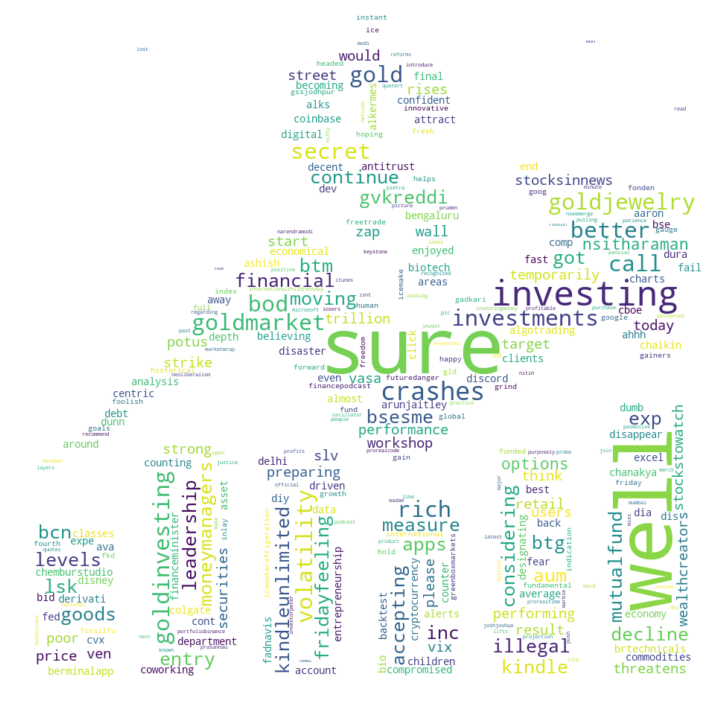

In [553]:
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(14) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 6 : Conclusion
 On the basis of wordcloud and the sentiment analysis we can interpret that:
 

*   People are slightly hopeful for the market. as the polarity is about 0.20877255861022098.
*  Value of subjectivity is 0.6015076554037588. It shows that the positive sentiment is slightly subjective. 
* All in all we can say that the result of our analysis is almost nutral. 
* The biggest words are  **Well, Gold, Crashes, Sure , Investing** etc. It shows that people are afraid of crashes as well as hopefull for gold investments. 

### _Thus we can say that the market sentiments for current data are **slightly positive and this positivivity has a little degree of uncertainity.**_


<h1> <center> Thank You! </center> </h1>